In [52]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [38]:
# Read from extracted data
df = pd.read_csv('../data/test_scaled_2022-10-29_2127.csv')

In [39]:
df.head()

,fl_date,mkt_carrier,mkt_carrier_fl_num,origin_airport_id,dest_airport_id,origin_region_Midwest,origin_region_Northeast,origin_region_South,origin_region_West,dest_region_Midwest,...,mean_payload_per_departure,mean_seats_per_departure,mean_passengers_per_departure,mean_freight_per_departure,mean_mail_per_departure,mean_empty_seats_per_departure,mean_dep_delay_carrier_origin_month,mean_arr_delay_carrier_origin_month,mean_dep_delay_carrier_origin_date_t-1_year_month,mean_arr_delay_carrier_origin_date_t-1_year_month
0,2020-01-01,WN,5888,13891,14771,0.0,0.0,0.0,1.0,0.0,...,-0.311631,-0.279990,-1.076595,-0.235296,-0.337765,1.258195,0.0,1.776357e-15,0.0,1.776357e-15
1,2020-01-01,WN,4761,13891,14831,0.0,0.0,0.0,1.0,0.0,...,0.299218,0.639417,1.441133,-0.216891,2.048351,-1.361740,0.0,1.776357e-15,0.0,1.776357e-15
2,2020-01-01,WN,5162,13891,14831,0.0,0.0,0.0,1.0,0.0,...,-0.512709,-0.668184,-0.371240,-0.260367,-0.302468,-0.262767,0.0,1.776357e-15,0.0,1.776357e-15
3,2020-01-01,WN,6152,13891,14831,0.0,0.0,0.0,1.0,0.0,...,0.812435,0.864161,0.800304,-0.263984,2.164388,-0.135828,0.0,1.776357e-15,0.0,1.776357e-15
4,2020-01-01,WN,1679,13891,14893,0.0,0.0,0.0,1.0,0.0,...,0.516269,-1.383278,-0.532762,0.053639,-0.341615,-0.894262,0.0,1.776357e-15,0.0,1.776357e-15


In [40]:
df.columns

Index(['fl_date', 'mkt_carrier', 'mkt_carrier_fl_num', 'origin_airport_id',
       'dest_airport_id', 'origin_region_Midwest', 'origin_region_Northeast',
       'origin_region_South', 'origin_region_West', 'dest_region_Midwest',
       'dest_region_Northeast', 'dest_region_South', 'dest_region_West',
       'arr_hrs_ctg_Afternoon', 'arr_hrs_ctg_Evening', 'arr_hrs_ctg_Morning',
       'arr_hrs_ctg_Night', 'dep_hrs_ctg_Afternoon', 'dep_hrs_ctg_Evening',
       'dep_hrs_ctg_Morning', 'dep_hrs_ctg_Night', 'day_of_week_Friday',
       'day_of_week_Monday', 'day_of_week_Saturday', 'day_of_week_Sunday',
       'day_of_week_Thursday', 'day_of_week_Tuesday', 'day_of_week_Wednesday',
       'haul_length_long', 'haul_length_medium', 'haul_length_short',
       'crs_elapsed_time', 'distance', 'mean_payload_per_departure',
       'mean_seats_per_departure', 'mean_passengers_per_departure',
       'mean_freight_per_departure', 'mean_mail_per_departure',
       'mean_empty_seats_per_departure', 'mean

In [41]:
columns_for_ID =[
'fl_date',
 'mkt_carrier',
 'mkt_carrier_fl_num','origin_airport_id', 'dest_airport_id']

df = df.set_index(columns_for_ID)

#### XGBoost

In [42]:
# Load the XGBoost model from Pickle
xgb_model = pickle.load(open('XGBoost_2022-10-29_2305.pickle', 'rb'))

In [49]:
model_name =  'xgb' # model name here
column_name = 'predicted_delay_'+model_name
results = pd.DataFrame(xgb_model.predict(df),columns=[column_name], 
    index=df.index) # test_scaled is name of the test_flights dataframe

#### Random Forest

In [45]:
# Load the XGBoost model from Pickle
rf_model = pickle.load(open('Random_Forest_2022-10-29_2317.pickle', 'rb'))

In [50]:
model_name =  'random_forest' # model name here
column_name = 'predicted_delay_'+model_name
results[column_name] = rf_model.predict(df)

In [51]:
results

predicted_delay_xgb  \
fl_date    mkt_carrier mkt_carrier_fl_num origin_airport_id dest_airport_id                        
2020-01-01 WN          5888               13891             14771                      -0.073643   
                       4761               13891             14831                      -0.137862   
                       5162               13891             14831                      -0.398208   
                       6152               13891             14831                       0.111913   
                       1679               13891             14893                       0.030773   
...                                                                                          ...   
2020-01-14 DL          546                11618             10397                      -0.125582   
                       549                10397             14843                       0.107808   
                       550                13487             14492                       0.121456   
                       555                13487             10423                      -0.041341   
                       569                10397             13487                      -0.031331   

                                                                             predicted_delay_random_forest  
fl_date    mkt_carrier mkt_carrier_fl_num origin_airport_id dest_airport_id                                 
2020-01-01 WN          5888               13891             14771                                 0.301949  
                       4761               13891             14831                                 0.331641  
                       5162               13891             14831                                 0.068028  
                       6152               13891             14831                                 0.325443  
                       1679               13891             14893                                 0.363109  
...                                                                                                    ...  
2020-01-14 DL          546                11618             10397                                -0.167112  
                       549                10397             14843                                 0.035038  
                       550                13487             14492                                 0.270676  
                       555                13487             10423                                -0.107703  
                       569                10397             13487                                 0.180423  

[102581 rows x 2 columns]

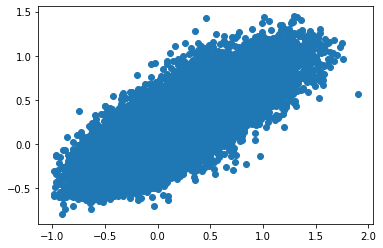

In [54]:
x = results['predicted_delay_xgb']
y = results['predicted_delay_random_forest']
plt.scatter(x, y)

In [55]:
results.to_csv("submission.csv", index=False)